In [3]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache using fc-list. This may take a moment.


## Data import

Import education data, filtering for rows which are only highschools that have grades 9, 10, 11, and 12.

In [15]:
school_data = pd.read_csv("data/CRDC 2015-16 School Data.csv", encoding = "ISO-8859-1")
school_layout = pd.read_csv("data/CRDC 2015-16 School Data Record Layout.csv", encoding = "ISO-8859-1")
school_data = school_data[school_data.SCH_GRADE_G09 =='Yes']
school_data = school_data[school_data.SCH_GRADE_G10 == 'Yes']
school_data = school_data[school_data.SCH_GRADE_G11 == 'Yes']
school_data = school_data[school_data.SCH_GRADE_G12 == 'Yes']
school_data = school_data[school_data.JJ == 'No']
school_data = school_data[(school_data.TOT_SATACT_M+school_data.TOT_SATACT_F)/(school_data['TOT_ENR_M'] + school_data['TOT_ENR_F'])<1]   
school_data = school_data[school_data.SCH_SAL_TOTPERS_WFED>0]
school_data = school_data[school_data.SCH_NPE_WFED>0]
len(school_data)
school_data.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,6,23,24,25,30,31,1828) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


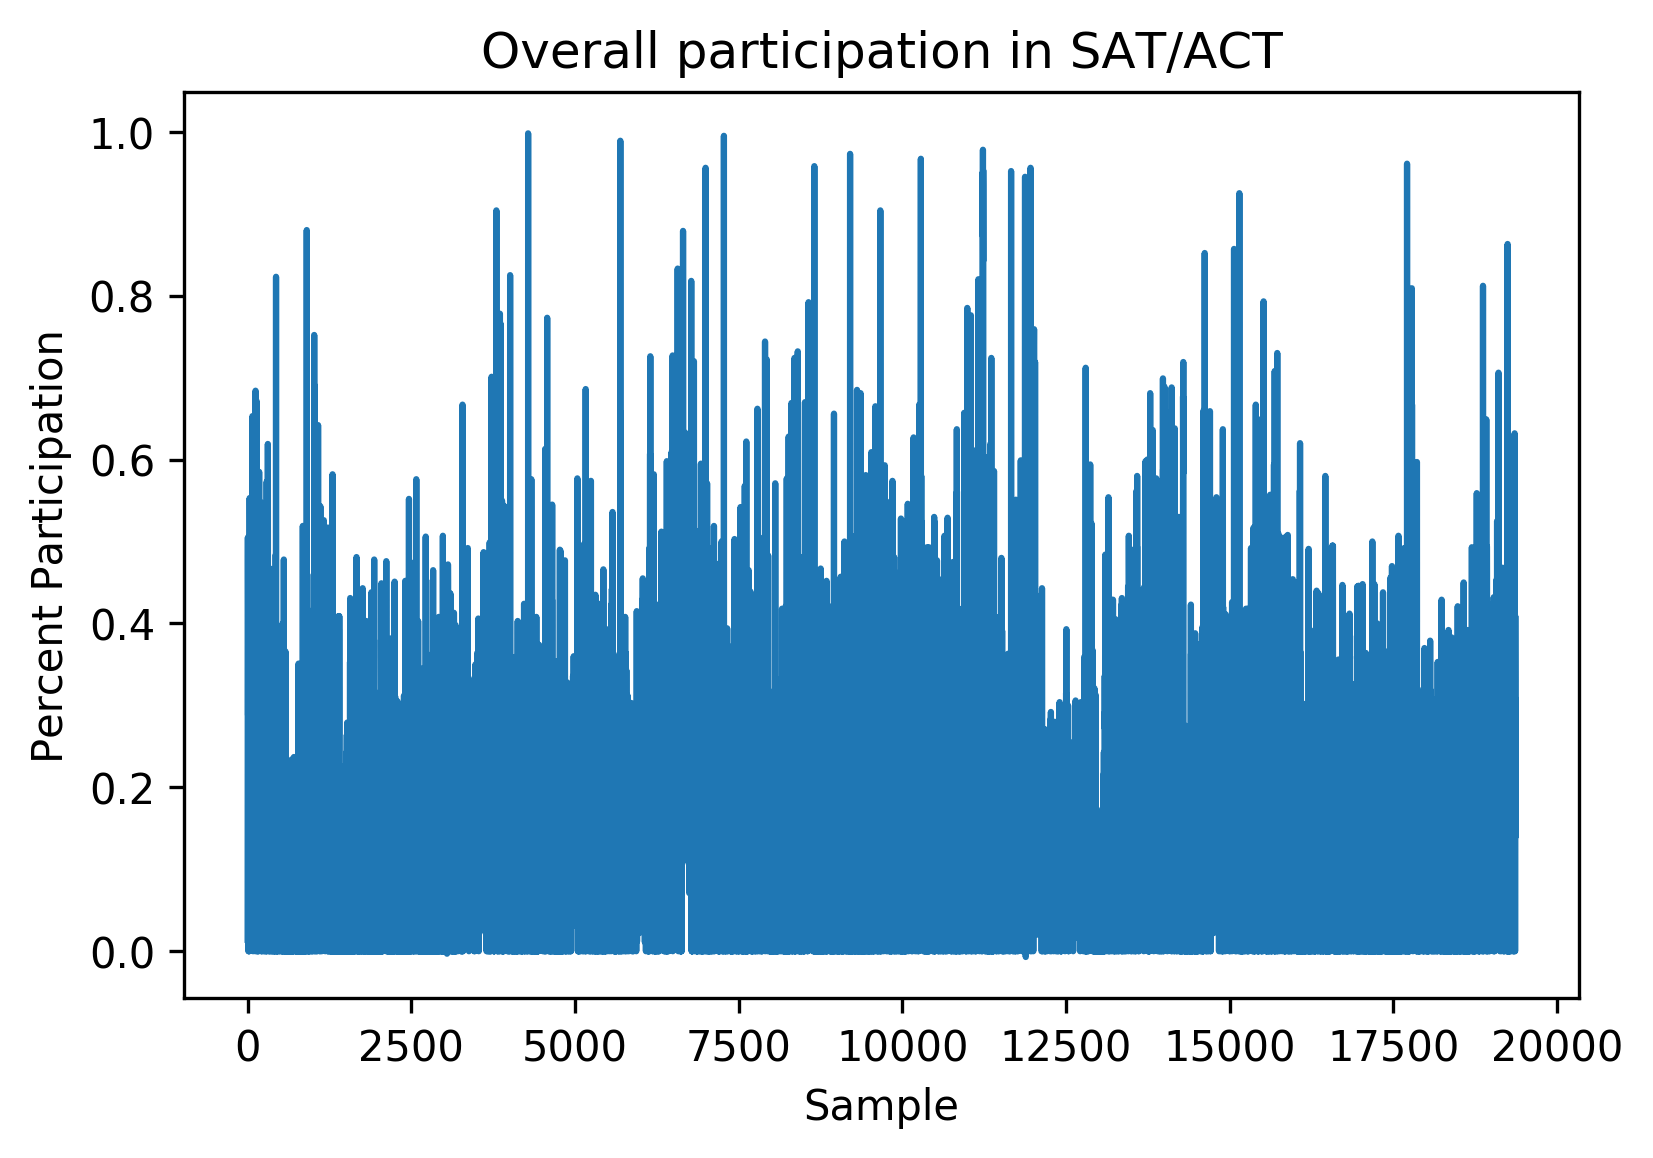

0

In [132]:
# SAT&ACT participation aggregate percent value
plt.figure(dpi=300)
sat_data = school_data.iloc[: , 679:698]
test_participation = school_data['TOT_SATACT_M'] + school_data['TOT_SATACT_F']
school_population = school_data['TOT_ENR_M'] + school_data['TOT_ENR_F']
test_pop_percents = round(test_participation / school_population, 3)
plt.plot(test_pop_percents)
plt.ylabel("Percent Participation")
plt.xlabel("Sample")
plt.title("Overall participation in SAT/ACT")
plt.show()
len(test_pop_percents[test_pop_percents>100])


In [46]:
'''
school_input_factors = pd.DataFrame()
school_input_factors['FUNDING_PER_STUDENT']=(school_data.SCH_SAL_TOTPERS_WFED+school_data.SCH_NPE_WFED) / (school_data.TOT_ENR_M + school_data.TOT_ENR_F)

school_input_factors['PERCENT_ENR_HI'] = (school_data.SCH_ENR_HI_M+school_data.SCH_ENR_HI_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_AM'] = (school_data.SCH_ENR_AM_M+school_data.SCH_ENR_AM_F+  school_data.SCH_ENR_HP_M+school_data.SCH_ENR_HP_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_AS'] = (school_data.SCH_ENR_AS_M+school_data.SCH_ENR_AS_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_BL'] = (school_data.SCH_ENR_BL_M+school_data.SCH_ENR_BL_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_WH'] = (school_data.SCH_ENR_WH_M+school_data.SCH_ENR_WH_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_TR'] = (school_data.SCH_ENR_TR_M+school_data.SCH_ENR_TR_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)

school_input_factors['CORP_PUNISH'] = (school_data.SCH_CORPINSTANCES_WODIS+school_data.SCH_CORPINSTANCES_WDIS)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['SCH_SIZE'] = (school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['SUSPENSION'] = (school_data.SCH_OOSINSTANCES_WODIS+school_data.SCH_OOSINSTANCES_IDEA+school_data.SCH_OOSINSTANCES_504)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['EXPULSIONS'] = (school_data.TOT_DISCWODIS_EXPZT_M+school_data.TOT_DISCWODIS_EXPZT_F+school_data.SCH_DISCWODIS_EXPZT_LEP_M+school_data.SCH_DISCWODIS_EXPZT_LEP_F
)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['RETENSION'] = school_data.TOT_RET_G09_M+school_data.TOT_RET_G09_F+school_data.TOT_RET_G10_M+school_data.TOT_RET_G10_F+school_data.TOT_RET_G11_M+school_data.TOT_RET_G11_F+school_data.TOT_RET_G12_M+school_data.TOT_RET_G12_F
school_input_factors.RETENSION[school_input_factors.RETENSION<0] = 0
school_input_factors['CHARTER'] = school_data.SCH_STATUS_CHARTER.eq('Yes').mul(1)
school_input_factors.CORP_PUNISH[school_input_factors.CORP_PUNISH<0] = 0
school_input_factors['ENG_PROF'] = (school_data.TOT_LEPENR_M+school_data.TOT_LEPENR_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['SCH_TEACHERS_CURR_TOT'] = school_data['SCH_TEACHERS_CURR_TOT']
school_input_factors['TOT_ABSENT'] = (school_data['TOT_ABSENT_M']+school_data['TOT_ABSENT_F'])/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
'''
nul_vals = [-2,-5,-6,-7,-8,-9, '-2', '-5', '-6','-7','-8','-9']
rates = []
rates_full = []
for (columnName, columnData) in school_data.iteritems():
    error_rate = round(len(school_data[columnName][school_data[columnName].isin(nul_vals)])/school_data.shape[0], 3)
    column_name = columnName
    rates.append(error_rate)
    rates_full.append([error_rate, column_name])
    #print(error_rate, column_name)
input_columns = []
for [perc, name] in rates_full:
    if perc == 0:
        if school_data[name].dtype == 'int64':
            input_columns.append(name)
            
print(len(input_columns))

school_input_factors = school_data[input_columns]
totals = [s for s in input_columns if "TOT" not in s]
SAT_things = [s for s in input_columns if "SATACT" in s]
DIS_things = [s for s in input_columns if "WDIS" in s]
bad_things = SAT_things+totals+['SCHID']+DIS_things
school_input_factors.drop(bad_things,axis=1,inplace = True)
school_input_factors['FUNDING_PER_STUDENT']=(school_data.SCH_SAL_TOTPERS_WFED+school_data.SCH_NPE_WFED) / (school_data.TOT_ENR_M + school_data.TOT_ENR_F)


457


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
school_input_factors

,TOT_ENR_M,TOT_ENR_F,TOT_LEPENR_M,TOT_LEPENR_F,TOT_LEPPROGENR_M,TOT_LEPPROGENR_F,TOT_504ENR_M,TOT_504ENR_F,TOT_DISCWODIS_ISS_M,TOT_DISCWODIS_ISS_F,...,TOT_DISCWODIS_EXPZT_F,TOT_DISCWODIS_TFRALT_M,TOT_DISCWODIS_TFRALT_F,TOT_DISCWODIS_REF_M,TOT_DISCWODIS_REF_F,TOT_ABSENT_M,TOT_ABSENT_F,SCH_TEACHERS_CURR_TOT,SCH_TEACHERS_PREV_TOT,FUNDING_PER_STUDENT
0,908,0,13,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,38,37,2552.863436
1,645,650,64,40,64,40,5,9,4,2,...,0,0,0,2,0,140,136,72,71,2284.898023
2,289,250,20,17,20,17,2,2,67,19,...,0,16,7,2,0,55,54,30,25,7175.930186
3,310,284,17,5,17,5,8,2,90,84,...,0,7,0,4,0,79,78,38,32,7004.081330
4,236,223,0,2,0,2,2,2,50,23,...,0,32,11,0,2,68,56,29,29,7937.212593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19364,49,51,0,0,0,0,0,0,2,2,...,0,0,0,0,0,10,16,16,11,15156.660000
19365,203,197,2,2,2,2,2,2,36,16,...,0,0,0,5,0,22,13,26,20,4249.373750
19366,41,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,12,102931.140000
19367,21,18,2,0,0,0,2,0,5,2,...,0,0,0,0,0,10,7,7,4,8724.256410


## Regression Setup

In [48]:
def linear_regression(X, y):
    w, _, _, _ = np.linalg.lstsq(X, y, rcond=-1)
    return w

In [49]:
def fit_model(dfx, dfy):
    # Note: this is might not really be a fair way to do a training / testing split
    # since it will result in instances that were very close in time falling in
    # both the training and testing set
    X_train, X_test, y_train, y_test = \
        train_test_split(dfx, dfy)

    model = LinearRegression()
    model.fit(X_train, y_train)
#     for i, c in enumerate(cols):
#       print('w_%d (the weight for %s) = %f' % (i+1, c, model.coef_[i]))
    
#     print('w_%d (the weight for the bias term) = %f' % (len(cols) + 1, model.intercept_))

    print("\ny actual is within 5 of y predicted:")
    print('Accuracy on training set', (abs(model.predict(X_train) - y_train)<.05).mean())
    print('Accuracy on testing set', (abs(model.predict(X_test) - y_test)<.05).mean())
    print("\ny actual is within 10 of y predicted:")
    print('Accuracy on training set', (abs(model.predict(X_train) - y_train)<.10).mean())
    print('Accuracy on testing set', (abs(model.predict(X_test) - y_test)<.10).mean())
    return model

## Regression of School Success

In [50]:
# X_education = revs_total_1992.drop(columns=['STATE', 'AVG_MATH_8_SCORE'])
# y_education = revs_total_1992['AVG_MATH_8_SCORE']

# The columns we are inputting (the input)
X_experimental = school_input_factors #change assignent here

# The column(s) we are predicting (the output)
Y_experimental = test_pop_percents #change assignent here

In [51]:
X_experimental['bias'] = 1
# display the outputed weights to the input columns so that we can look
# at the calculated correlations relative to each input.
model_output = list(zip(linear_regression(X_experimental, Y_experimental), X_experimental.columns))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


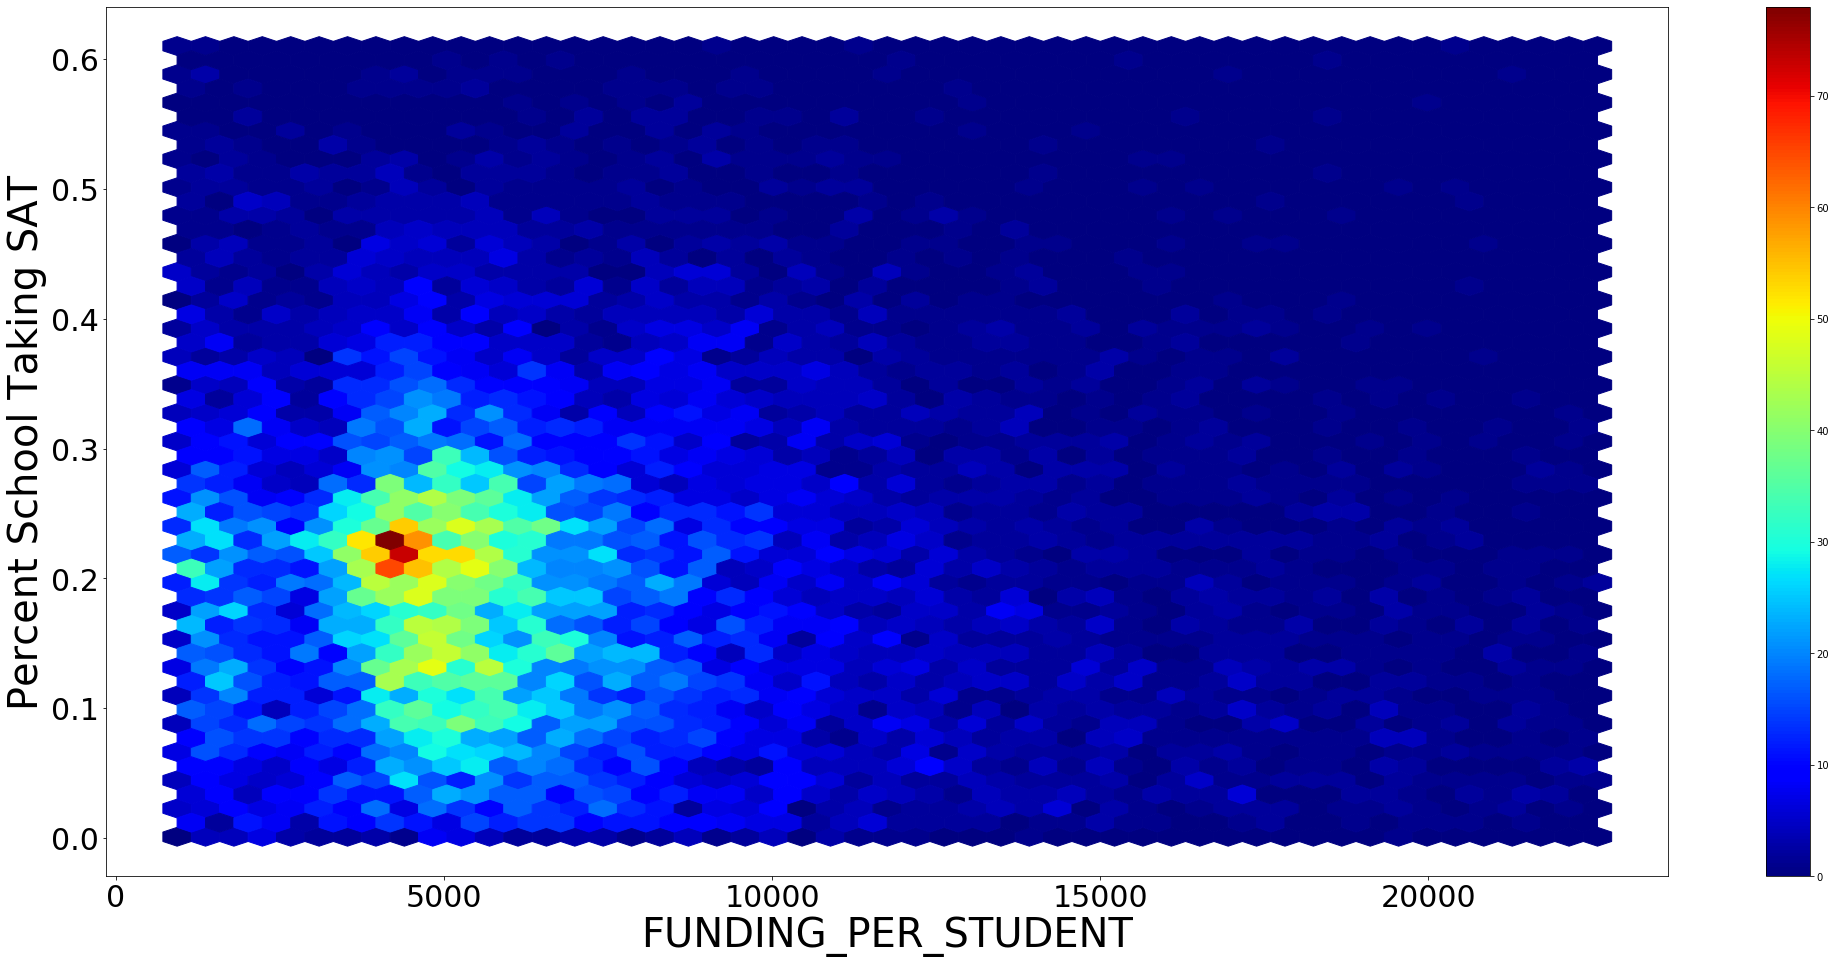

In [126]:
x_ed = X_experimental
y_ed = Y_experimental

#y_ed = y_ed[X_experimental.FUNDING_PER_STUDENT<15000]
#x_ed = x_ed[X_experimental.FUNDING_PER_STUDENT<15000]
plt.figure(figsize=(35, 16))
#for idx, col in enumerate(x_ed):
col = 'FUNDING_PER_STUDENT'
#col1 = 'TOT_LEPENR_F'
#'SCH_TEACHERS_CURR_TOT'
#TOT_LEP_M

if True:
    good_data_1 = x_ed[col].index[(x_ed[col]<(1.5*x_ed[col].quantile(.9)))].tolist()
    good_data_0 = x_ed[col].index[(x_ed[col]>(.5*x_ed[col].quantile(.1)))].tolist()
    good_data_eh = list(set(good_data_1) & set(good_data_0))
    
    #good_data_5 = x_ed[col1].index[(x_ed[col1]<(1.5*x_ed[col1].quantile(.9)))].tolist()
    #good_data_6 = x_ed[col1].index[(x_ed[col1]>(.5*x_ed[col1].quantile(.1)))].tolist()
    #good_data_meh = list(set(good_data_5) & set(good_data_6))
    
    good_data_3 = y_ed.index[(y_ed<(1.5*y_ed.quantile(.95)))].tolist()
    good_data_4 = y_ed.index[(y_ed>(.5*y_ed.quantile(.05)))].tolist()
    good_data_almost = list(set(good_data_3) & set(good_data_4))
    
    good_data = list(set(good_data_eh) & set(good_data_almost))
    #good_data = list(set(good_data_eh) & set(good_data_almost) & set(good_data_meh))
    
    #plt.subplot(1, 2, idx+1)
    plt.hexbin(x_ed[col].ix[good_data]+x_ed[col1].ix[good_data], y_ed.ix[good_data], gridsize=50, cmap='jet')
    plt.colorbar()
    plt.xlabel(col,fontsize=40)
    plt.ylabel('Percent School Taking SAT',fontsize=40)
    

#plt.subplots_adjust(wspace=.2)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [121]:
fit_model(x_ed,y_ed)


y actual is within 5 of y predicted:
Accuracy on training set 0.3003579787966405
Accuracy on testing set 0.27833987198017757

y actual is within 10 of y predicted:
Accuracy on training set 0.5541098719537382
Accuracy on testing set 0.5467685319017138


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
import pprint
norm_weights = []
sun=0
for val, col in model_output:
    #print(col, val/x_ed[col].mean())
    norm_weights.append([col, val*x_ed[col].mean()])
    sun = sun+val
hello = sorted(norm_weights, key = lambda x: x[1])
print(sun)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(hello)

0.14543975353108163
[   ['TOT_ABSENT_M', -0.03613156292079237],
    ['TOT_LEPENR_M', -0.012176654376019431],
    ['TOT_DISCWODIS_ISS_F', -0.006834833986006895],
    ['TOT_DISCWODIS_MULTOOS_M', -0.0049639565296630325],
    ['TOT_LEPPROGENR_F', -0.004288692864466618],
    ['TOT_DAYSMISSED_F', -0.0014769901292038977],
    ['FUNDING_PER_STUDENT', -0.0006283882088832886],
    ['TOT_DISCWODIS_EXPWE_M', -0.0006230950997628444],
    ['TOT_504ENR_F', -0.0004020879485447384],
    ['TOT_DISCWODIS_EXPWOE_F', -0.00019884642533262229],
    ['TOT_DISCWODIS_EXPZT_F', -0.00011128844059823861],
    ['TOT_ENR_M', 3.228714973649957e-05],
    ['TOT_DISCWODIS_TFRALT_F', 0.00012407858499285522],
    ['TOT_504ENR_M', 0.00014478570003114726],
    ['SCH_TEACHERS_CURR_TOT', 0.00024640746647221256],
    ['TOT_DISCWODIS_EXPZT_M', 0.00026913735400405775],
    ['TOT_DISCWODIS_EXPWOE_M', 0.000275193062977565],
    ['TOT_DISCWODIS_EXPWE_F', 0.0003063459270886586],
    ['TOT_DISCWODIS_TFRALT_M', 0.00040901297695485755]